In [35]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df= pd.read_csv("fast_food_consumption_health_impact_dataset.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               800 non-null    int64  
 1   Gender                            800 non-null    object 
 2   Fast_Food_Meals_Per_Week          800 non-null    int64  
 3   Average_Daily_Calories            800 non-null    int64  
 4   BMI                               800 non-null    float64
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64
 6   Sleep_Hours_Per_Day               800 non-null    float64
 7   Energy_Level_Score                800 non-null    int64  
 8   Digestive_Issues                  800 non-null    object 
 9   Doctor_Visits_Per_Year            800 non-null    int64  
 10  Overall_Health_Score              800 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 68.9+ KB


In [ ]:
df.isnull().sum() 

Age                                 0
Gender                              0
Fast_Food_Meals_Per_Week            0
Average_Daily_Calories              0
BMI                                 0
Physical_Activity_Hours_Per_Week    0
Sleep_Hours_Per_Day                 0
Energy_Level_Score                  0
Digestive_Issues                    0
Doctor_Visits_Per_Year              0
Overall_Health_Score                0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Gender'].value_counts()

Gender
Male      385
Female    381
Other      34
Name: count, dtype: int64

In [19]:

df = df[df['Gender'] != 'Other']

df['Gender'].value_counts()

#Elimino El grupo 'Other' porque solo contaba con 34 registros, y considero
# que podría generar sesgos en las comparaciones de promedios frente a los grupos."

Gender
Male      385
Female    381
Name: count, dtype: int64

In [21]:
#Pregunta 1. ¿Quién come más chatarra?

genero = df.groupby("Gender")["Fast_Food_Meals_Per_Week"].mean().reset_index()

fig = px.bar(
    genero, 
    x="Gender", 
    y="Fast_Food_Meals_Per_Week",
    title="Promedio de Comidas de Comida Rápida por Semana según Género",
    labels={"Fast_Food_Meals_Per_Week": "Promedio de Comidas", "Gender": "Género"},
    color="Gender", # Esto le pone un color distinto a cada barra
    text_auto='.2f' # Esto pone el número encima de la barra con 2 decimales
)

fig.show()


Se puede obsevar en la grafica que el consumo de comida en mujeres en ligeramente superior frente al masculino. Por ende, las mujeres tienden a comsumir mas comida chatarra con mayor frecuencia.

In [ ]:
# Pregunta 2: ¿Hay relación entre las calorías y el BMI?
fig = px.scatter(
    df, 
    x="Average_Daily_Calories", 
    y="BMI", 
    color="Gender", 
    title="Relación entre Calorías Diarias y BMI",
    labels={"Average_Daily_Calories": "Calorías Diarias", "BMI": "Índice de Masa Corporal"}
)

fig.show()


En este caso no existe una relacion entre las calorias y el BMI, ya que, los puntos se distribuyen de manera uniforme por todo el grafico, por lo tanto el BMI esta influenciado por otras variables y no solamente por calorias.

In [30]:
#Pregunta 3: ¿Influye el ejercicio en los problemas digestivos?

px.box(df, 
       x="Digestive_Issues",
         y="Physical_Activity_Hours_Per_Week",
         title= "Actividad Física vs Problemas Digestivos",
         color="Digestive_Issues", 
         labels={"Physical_Activity_hours_per_Week":"Horas de actividad fisica por semana",
                 "Digestive_Issues": "¿Problemas digestivos?" })

Al comparar la distribución de las horas de actividad física, se observa que las medianas de ambos grupos (con y sin problemas digestivos) son similares. Por lo tanto, realizar actividad física no influye como un factor preventivo para evitar problemas digestivos

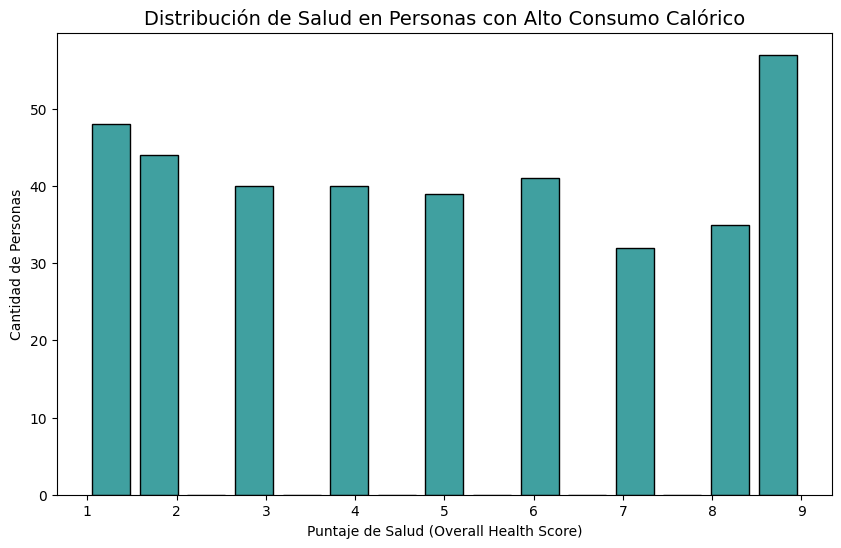

In [ ]:
#Pregunta 4: ¿Cómo es el nivel de salud de las personas que consumen calorías muy por encima del promedio?


promedio_calorias = df['Average_Daily_Calories'].mean()
alto_consumo = df[df['Average_Daily_Calories'] > promedio_calorias]


plt.figure(figsize=(10, 6))


sns.histplot(
    data=alto_consumo,
    x="Overall_Health_Score",
    bins=15,             
    color="teal",        
    edgecolor="black",   
    shrink=0.8          
)

plt.title('Distribución de Salud en Personas con Alto Consumo Calórico', fontsize=14)
plt.xlabel('Puntaje de Salud (Overall Health Score)')
plt.ylabel('Cantidad de Personas')

plt.show()

Se puede observar que muchas personas tienen un buen puntaje de salud (9).Pero hay un grupo importante con puntajes muy bajos (entre 1 y 2). Por lo que se pude intuir que no todos reaccionan igual al consumo alto de calorías, algunas personas lo toleran bien, mientras que en otras afecta gravemente su salud.

In [49]:
#Pregunta 5: ¿Qué porcentaje de la población tiene un BMI categorizado como 'Obesidad' y 
# cómo se distribuye su energía?

def categorizar_bmi (bmi):
    if bmi < 18.5: return "bajo peso"
    elif 18.5 <= bmi <= 24.9: return "normal"
    elif 25 <= bmi <= 29.9: return "sobrepeso"
    else:return "obesidad"

df["BMI_categoria"]= df["BMI"].apply(categorizar_bmi)



In [52]:
conteo_bmi = df['BMI_categoria'].value_counts().reset_index()
conteo_bmi = df['BMI_category'].value_counts().reset_index()
conteo_bmi.columns = ['Categoria', 'Cantidad']

fig = px.pie(
    conteo_bmi, 
    values='Cantidad', 
    names='Categoria', 
    title='Distribución de Categorías de BMI',
    hole=0.3 # Esto la hace tipo "donas", se ve más moderno
)
fig.show()

Al clasificar a las personas según su BMI, se observa que la mayoría no tiene un peso saludable. Aunque el 38.4% está en un rango normal, más de la mitad de la población presenta sobrepeso u obesidad. Se puede concluir que estos resultados muestran que el exceso de peso es un problema importante de salud en esta población.